# Example: IDEB Analysis

We are going to analyse data corresponding to the IDEB (Basic Education Development Index) for brazilian cities. The data comes from the file

In [1]:
ideb_file = "IDEB por Município Rede Federal Séries Finais (5ª a 8ª).xml"

which was obtained from the main brazilian government open data site <a href="http://dados.gov.br">dados.gov.br</a>

Since we have an .xml file, we'll use the *xml.etree.ElementTree* module to parse its contents. For simplicity, we'll call this module *ET*.

In [2]:
import xml.etree.ElementTree as ET

### The ElementTree (ET) module

An XML file is a hierarchical set of data, so the most intuitive way to represent this data is by a tree. To do this, the ET module implements two classes: the ElementTree class represents the whole XML file as a tree, and the Element class represents one node of this tree. All interactions that occurr with the whole file (like reading and writing to this file) are done through the ElementTree class; on the other hand, every interaction with an isolated element of the XML and its subelements are done through the Element class.

By reading the docs, we learn that the *ET.parse* methods returns an *ElementTree* from a file.

In [3]:
tree = ET.parse(ideb_file)

The *ElementTree* class has the following structure:

In [4]:
dir(tree)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_root',
 '_setroot',
 'find',
 'findall',
 'findtext',
 'getiterator',
 'getroot',
 'iter',
 'iterfind',
 'parse',
 'write',
 'write_c14n']

According to the documentation for this module, we access the ElementTree via its *root* node, which is an *Element* class instance. To see the root element, we use the *getroot* method:

In [5]:
root = tree.getroot()

As an *Element*, the root object has the *tag* and *attrib* properties, and *attrib* is a dictionary of its attributes. Let's see what are these values:

In [6]:
root.tag

'result'

In [7]:
root.attrib

{}

To access each child node of the root element, we iterate on these nodes (which are also *Elements*):

In [8]:
for child in root:
    print(child.tag, child.attrib)

url {}
id {}
nome {}
nome_estendido {}
descricao {}
inicio {}
final {}
formatacao {}
data_atualizacao {}
aditividade {}
url_origem {}
tempo_aditividade {}
portal_dados_abertos {}
disponibilizacao {}
estado {}
fonte_gestora {}
fonte_provedora {}
grupo_informacao {}
base_territorial {}
periodicidade {}
multiplicador {}
produto {}
publicacao {}
unidade_medida {}
orgao_primeiro_escalao {}
valores {}


We can see that our XML comes with a lot of data. Next, we will try to get a subset of this data.

### Selecting the data

Now that we have a better idea of the document's structure, let's build a pandas *DataFrame* with what we need. First, we can see that we only need the last node of the root element, "valores" (which stands for "values" in Portuguese); the other nodes are in fact just the header for the XML file. Let's explore this node.

In [9]:
IDEBvalues = root.find('valores')

Note that there is one more layer of data here:

In [10]:
IDEBvalues

<Element 'valores' at 0x7eff5c37a548>

In [11]:
IDEBvalues[0]

<Element 'entry' at 0x7eff5c37a598>

Now, we can explore the grandchildren of the root node: 

In [12]:
for child in IDEBvalues:
    for grandchild in child:
        print(grandchild.tag, grandchild.attrib)

valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
munic

Now, let's extract the data we are interested in:

In [13]:
data = []
for child in IDEBvalues:
    data.append([float(child[0].text), child[1].text, child[2].text])

In [14]:
data

[[4.7, '120040', '2009'],
 [6.0, '130260', '2009'],
 [5.9, '140010', '2009'],
 [5.5, '150140', '2009'],
 [4.0, '211130', '2009'],
 [6.3, '220190', '2009'],
 [6.9, '230440', '2009'],
 [7.1, '261160', '2009'],
 [6.5, '280670', '2009'],
 [7.1, '292740', '2009'],
 [6.0, '310620', '2009'],
 [6.3, '313670', '2009'],
 [6.4, '317020', '2009'],
 [5.7, '330455', '2009'],
 [6.9, '410690', '2009'],
 [5.7, '420540', '2009'],
 [5.8, '431490', '2009'],
 [7.3, '431690', '2009'],
 [7.1, '500270', '2009'],
 [5.3, '520870', '2009'],
 [4.4, '120040', '2007'],
 [5.3, '140010', '2007'],
 [5.2, '150140', '2007'],
 [3.4, '211130', '2007'],
 [4.3, '220190', '2007'],
 [6.8, '230440', '2007'],
 [7.5, '261160', '2007'],
 [5.4, '280670', '2007'],
 [7.2, '292740', '2007'],
 [5.5, '310620', '2007'],
 [7.0, '313670', '2007'],
 [6.0, '317020', '2007'],
 [6.1, '330455', '2007'],
 [5.8, '420540', '2007'],
 [6.2, '431490', '2007'],
 [6.5, '431690', '2007'],
 [6.5, '500270', '2007'],
 [5.5, '520870', '2007'],
 [6.7, '5300

Since <a href="http://pandas.pydata.org/">Pandas</a> seems to be fashionable right now ;) let's use it to store and treat this data. We'll give it a shorter name though, pd.

In [15]:
import pandas as pd

Now, we create our DataFrame from the preexisting data.

In [16]:
IDEBTable = pd.DataFrame(data, columns = ["Valor", "Municipio", "Ano"])

In [17]:
IDEBTable

,Valor,Municipio,Ano
0,4.7,120040,2009
1,6.0,130260,2009
2,5.9,140010,2009
3,5.5,150140,2009
4,4.0,211130,2009
5,6.3,220190,2009
6,6.9,230440,2009
7,7.1,261160,2009
8,6.5,280670,2009
9,7.1,292740,2009


You can see there are two sets of data here, one for 2007 and another for 2009. We'll only use the most recent data for our "analysis".

In [18]:
IDEBTable = IDEBTable.loc[0:19]

### Identifying the city codes

In our IDEBTable, cities are identified by their so called "IBGE Code", which is a code issued to each locality by the Brazilian Institute for Geography and Statistics (IBGE). In order to make this more user friendly, we'll read the most recent Excel file with the list of cities and their respective 7 digit codes (from 2014; these codes include a final verification digit). For this, we'll use the xlrd module, which must be manually installed; see <a href="https://pypi.python.org/pypi/xlrd">this</a>.

In [19]:
localCodesIBGE = pd.read_excel("DTB_2014_Municipio.xls")

Now we can inspect the data by using the pandas *head* method for DataFrames:

In [20]:
localCodesIBGE.head()

,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Cod Municipio Completo,Nome_Município
0,11,Rondônia,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes
2,11,Rondônia,2,Leste Rondoniense,8,Colorado do Oeste,31,1100031,Cabixi
3,11,Rondônia,2,Leste Rondoniense,6,Cacoal,49,1100049,Cacoal
4,11,Rondônia,2,Leste Rondoniense,8,Colorado do Oeste,56,1100056,Cerejeiras


The columns we are interested in are just "Nome_UF", "Cod Municipio Completo" and "Nome_Município", which stand for State (or Province), Complete City Code and City Name, respectively.

In [21]:
localCodesIBGE = localCodesIBGE[["Nome_UF", "Cod Municipio Completo", "Nome_Município"]]

Now, we have two DataFrames: **IDEBTable**, containing the complete IDEB data corresponding to city names, and **localCodesIBGE**, containing the corresponding city codes. We must select from the complete **localCodesIBGE** table only the rows corresponding to cities for which we have the IDEB value. For this, we will extract from both DataFrames the columns corresponding to the city codes (remember that in the **localCodesIBGE** table, codes have an extra verification code which we will not use):

In [22]:
IDEBCities = IDEBTable["Municipio"]
cities = localCodesIBGE["Cod Municipio Completo"].map(lambda x: str(x)[0:6])

Note that we have used *map* to transform numerical data into strings, removing the last digit.

Now, both **IDEBCities** and **cities** are pandas Series objects. To get the indices of cities for which we have IDEB data, first we will identify which codes are **not** in **IDEBCities**:

In [23]:
citiesToRemove = cities[~cities.isin(IDEBCities)]

We remove the corresponding rows from the localCodesIBGE table:

In [24]:
newTable = localCodesIBGE.drop(citiesToRemove.index).reset_index(drop=True)

Finally, we will create a new DataFrame joining city name and IDEB value:

In [25]:
finalData = pd.concat([newTable, IDEBTable], axis=1)

This gives

In [26]:
finalData

,Nome_UF,Cod Municipio Completo,Nome_Município,Valor,Municipio,Ano
0,Acre,1200401,Rio Branco,4.7,120040,2009
1,Amazonas,1302603,Manaus,6.0,130260,2009
2,Roraima,1400100,Boa Vista,5.9,140010,2009
3,Pará,1501402,Belém,5.5,150140,2009
4,Maranhão,2111300,São Luís,4.0,211130,2009
5,Piauí,2201903,Bom Jesus,6.3,220190,2009
6,Ceará,2304400,Fortaleza,6.9,230440,2009
7,Pernambuco,2611606,Recife,7.1,261160,2009
8,Sergipe,2806701,São Cristóvão,6.5,280670,2009
9,Bahia,2927408,Salvador,7.1,292740,2009


## Finishing up: a pretty figure

In order to include graphics in notebooks, usually the first cell in the notebook contains the code

% matplotlib inline

or

% matplotlib notebook

Since we don't want to sacrifice the legibility of our *article* by starting it with some misterious command, we can use the **init_cell** nbextension so that a later cell is executed first on our notebook ([More details](#about_initcell)).

First, let's import the pyplot sublibrary of the matplotlib library and call it plt:

In [27]:
import matplotlib.pyplot as plt

We'll do a very simple plot, but for this it would be nice to use the city names instead of the numerical indices in the finalData table:

In [28]:
finalData.set_index(["Nome_Município"], inplace=True)

Now, we will select the column with the values ("Valor") for the IDEB by city in the finalData table (note that the result of this operation is a Series):

In [29]:
finalData["Valor"]

Nome_Município
Rio Branco        4.7
Manaus            6.0
Boa Vista         5.9
Belém             5.5
São Luís          4.0
Bom Jesus         6.3
Fortaleza         6.9
Recife            7.1
São Cristóvão     6.5
Salvador          7.1
Belo Horizonte    6.0
Juiz de Fora      6.3
Uberlândia        6.4
Rio de Janeiro    5.7
Curitiba          6.9
Florianópolis     5.7
Porto Alegre      5.8
Santa Maria       7.3
Campo Grande      7.1
Goiânia           5.3
Name: Valor, dtype: float64

We are ready for our pretty (yet irrelevant) picture.

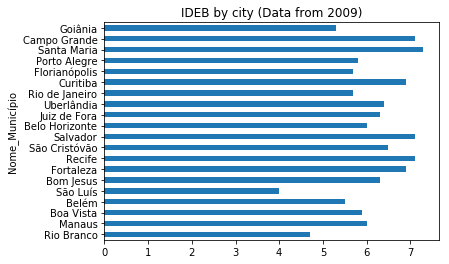

In [32]:
finalData["Valor"].plot(kind='barh')
plt.title("IDEB by city (Data from 2009)")

## Comments about automatic documentation and script generation

To convert this notebook to a regular Python .py script, use 

The removeextracode.tpl has the following content:

This means that we will include all notebook cells tagged with **codecomment** as comments on our script. This is to avoid generating a unusable script including our inspection of objects and attempts at solving a problem.

For more details on templates and the nbconvert extension, check <a href="https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/">this page</a>, for example.

To generate a PDF via LaTeX, you must have pandoc installed. Then, you can use

to generate the PDF with the latexwithverb.tplx template. This template has some special formatting options for verbatim code. You can customize your own template or just use the basic options that nbconvert provides in the documentation.

## Initialization cell <a id='about_initcell'></a>

Through the "init_cell" extension (also from nbextensions), it is possible to alter the order of execution of notebook cells. If we look at the metadata of the cell below, we can see that it is marked to be executed before all other cells, and so we obtain the desired result when we run all cells in the notebook. (This command allows us to see inline graphics inside our notebook).

In [31]:
%matplotlib inline